In [1]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
# import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [2]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [3]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [4]:
# num_classes = dataset.num_classes
# num_classes

In [5]:
#Loading the dataset

names = [datasets.AAUZebraFish,
    datasets.CatIndividualImages,
    datasets.CTai,
    datasets.CZoo,
    datasets.CowDataset,
    datasets.DogFaceNet,
    datasets.Drosophila,
    datasets.LionData,
    datasets.MacaqueFaces,
    datasets.MPDD,
    datasets.NDD20v2,
    datasets.NyalaData,
    datasets.PolarBearVidID,
    datasets.SealIDSegmented,
    datasets.SeaStarReID2023,
    datasets.SeaTurtleID2022,
    datasets.SeaTurtleIDHeads,
    datasets.StripeSpotter,
    datasets.ZindiTurtleRecall
]

In [6]:
l = ['datasets.AAUZebraFish',
 'datasets.CatIndividualImages',
 'datasets.CTai',
 'datasets.CZoo',
 'datasets.CowDataset',
 'datasets.DogFaceNet',
 'datasets.Drosophila'
 'datasets.LionData',
 'datasets.MacaqueFaces',
 'datasets.MPDD',
 'datasets.NDD20v2',
 'datasets.NyalaData',
 'datasets.PolarBearVidID',
 'datasets.SealIDSegmented',
 'datasets.SeaStarReID2023',
 'datasets.SeaTurtleID2022',
 'datasets.SeaTurtleIDHeads',
 'datasets.StripeSpotter',
 'datasets.ZindiTurtleRecall']

In [7]:
roots = ['data/' + str(dataset).split('.')[1] for dataset in l]
roots

['data/AAUZebraFish',
 'data/CatIndividualImages',
 'data/CTai',
 'data/CZoo',
 'data/CowDataset',
 'data/DogFaceNet',
 'data/Drosophiladatasets',
 'data/MacaqueFaces',
 'data/MPDD',
 'data/NDD20v2',
 'data/NyalaData',
 'data/PolarBearVidID',
 'data/SealIDSegmented',
 'data/SeaStarReID2023',
 'data/SeaTurtleID2022',
 'data/SeaTurtleIDHeads',
 'data/StripeSpotter',
 'data/ZindiTurtleRecall']

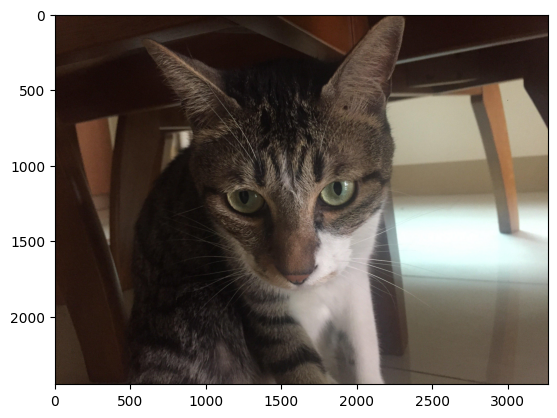

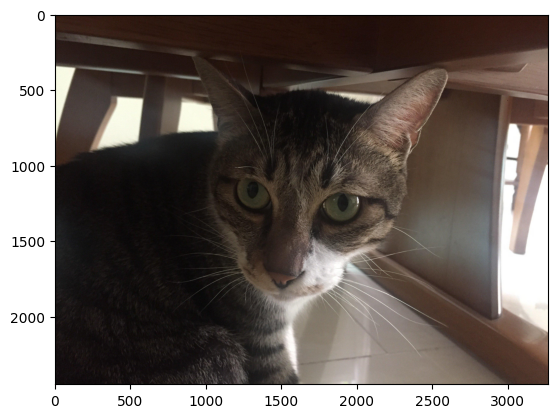

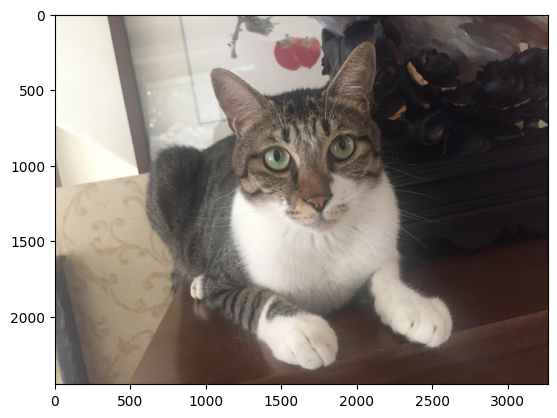

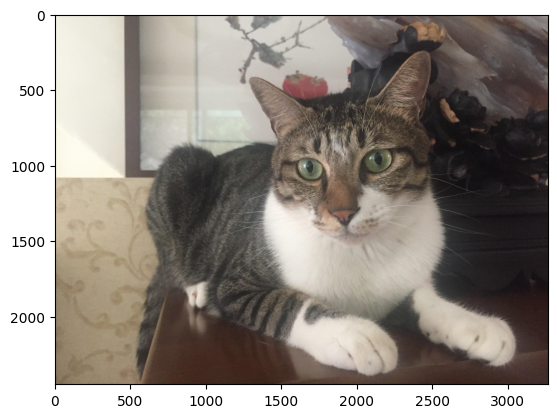

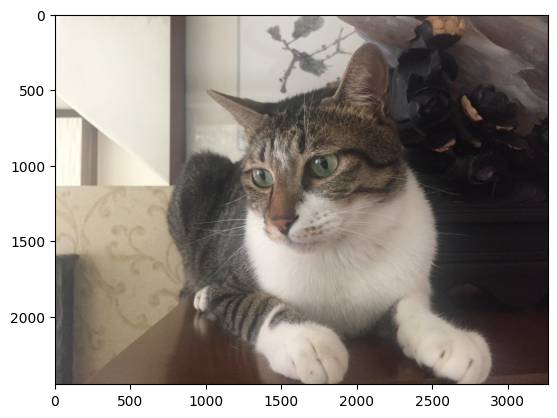

In [8]:
root = roots[1]
m = names[1](root)
df = m.df
plot_bbox_segmentation(df, root, 5)

In [9]:
df

,image_id,identity,path
0,0001_000,1,cat_individuals_dataset\0001\0001_000.JPG
1,0001_001,1,cat_individuals_dataset\0001\0001_001.JPG
2,0001_002,1,cat_individuals_dataset\0001\0001_002.JPG
3,0001_003,1,cat_individuals_dataset\0001\0001_003.JPG
4,0001_004,1,cat_individuals_dataset\0001\0001_004.JPG
...,...,...,...
13016,0516_022,516,cat_individuals_dataset\0516\0516_022.jpg
13017,0516_023,516,cat_individuals_dataset\0516\0516_023.jpg
13018,0516_024,516,cat_individuals_dataset\0516\0516_024.jpg
13019,0516_025,516,cat_individuals_dataset\0516\0516_025.jpg


Number of identitites            509
Number of all animals            13021
Number of animals with one image 0
Number of unidentified animals   0


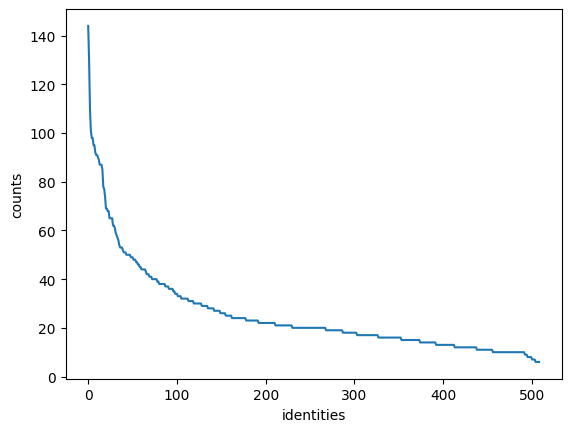

In [10]:
display_statistics(df)

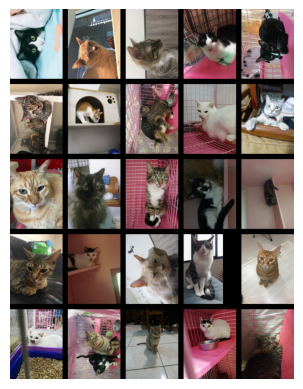

In [11]:
m.plot_grid(n_cols=5);

In [12]:
print(df.columns)

Index(['image_id', 'identity', 'path'], dtype='object')


In [13]:
unique_categories = df['identity'].unique()
print(unique_categories)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  71  72  73  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 117 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 25

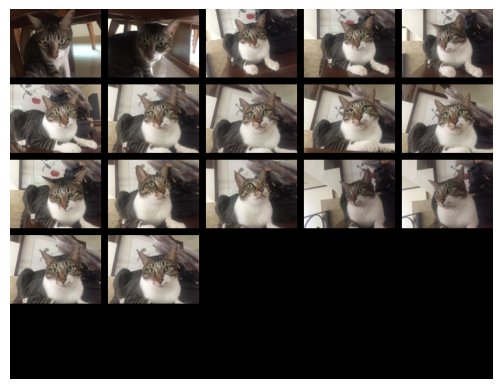

In [14]:
m.plot_grid(n_cols=5, idx=df['identity']==1);

In [15]:
print(m)

In [16]:
df

,image_id,identity,path
0,0001_000,1,cat_individuals_dataset\0001\0001_000.JPG
1,0001_001,1,cat_individuals_dataset\0001\0001_001.JPG
2,0001_002,1,cat_individuals_dataset\0001\0001_002.JPG
3,0001_003,1,cat_individuals_dataset\0001\0001_003.JPG
4,0001_004,1,cat_individuals_dataset\0001\0001_004.JPG
...,...,...,...
13016,0516_022,516,cat_individuals_dataset\0516\0516_022.jpg
13017,0516_023,516,cat_individuals_dataset\0516\0516_023.jpg
13018,0516_024,516,cat_individuals_dataset\0516\0516_024.jpg
13019,0516_025,516,cat_individuals_dataset\0516\0516_025.jpg


In [17]:
df['path'][0]

'cat_individuals_dataset\\0001\\0001_000.JPG'

In [18]:
dataset_path_prefix = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\CatIndividualImages\\'
df['path'] = df['path'].apply(lambda x: os.path.join(dataset_path_prefix, x))

df['path'][0]

'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\CatIndividualImages\\cat_individuals_dataset\\0001\\0001_000.JPG'

Number of images: 13021
Number of unique labels: 509


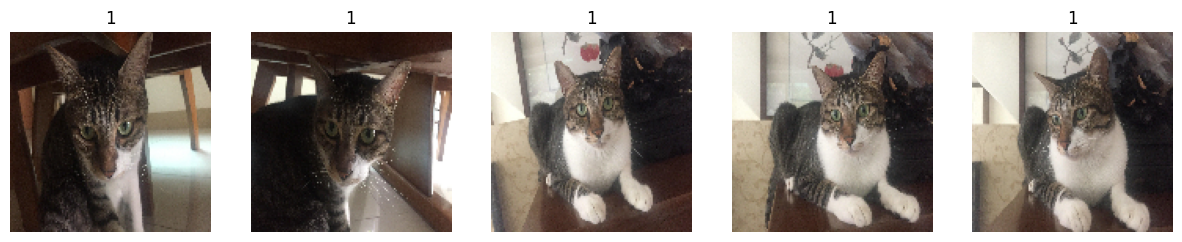

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
def load_images_from_dataframe(dataframe, target_size=(256, 256)):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        file_path = row['path']
        image = cv2.imread(file_path)
        if image is not None:
            # Resize image to target size
            resized_image = cv2.resize(image, target_size)
            images.append(resized_image)
            labels.append(row['identity'])
    return images, labels

# Modify target_size as needed, e.g., (128, 128) for smaller images
target_size = (128, 128)
images, labels = load_images_from_dataframe(df, target_size=target_size)

# Print the count of images and unique labels
print(f"Number of images: {len(images)}")
print(f"Number of unique labels: {len(set(labels))}")

# Plot a sample of images with their corresponding labels
num_samples = min(5, len(images))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [20]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [21]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [23]:
# Extract features from database images
database_features = []
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    database_features.append((keypoints, descriptors))

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0
c = 0
# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    # Initialize dictionary to store similarity scores
    similarity_scores = {}
    
    # Compare query features with database features
    for i, (db_keypoints, db_descriptors) in enumerate(database_features):
        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        # Convert descriptors to the same type
        if db_descriptors is None:
            c+=1
            continue
        query_descriptors = query_descriptors.astype(np.float32)
        db_descriptors = db_descriptors.astype(np.float32)

        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(query_descriptors, db_descriptors, k=2)

        # Check if matches exist
        if len(matches) < 2:
            continue
        
        # Apply ratio test
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        
        # Calculate similarity score (e.g., based on the number of good matches)
        similarity_score = len(good_matches)
        
        # Store similarity score for this database image
        similarity_scores[i] = similarity_score
    
    # Sort similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top-k most similar images
    top_k = 5  # Adjust as needed
    top_k_indices = [index for index, _ in sorted_scores[:top_k]]
    
    # Get the predicted label for each top-k image
    predicted_labels = [database_labels[index] for index in top_k_indices]
    
    # Check if the query label matches any of the predicted labels
    if query_label in predicted_labels:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)

Accuracy: 0.06
